In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario en versiones antiguas de mpl
import numpy as np
import pandas as pd
import re


# **chapter 2**

### Plotting Figure 2.3

C:\Users\AESPINA\AppData\Local\Temp\ipykernel_7604\415988273.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("environmental_modeling\chapter2\le98temp.dat", delim_whitespace=True, header=None)


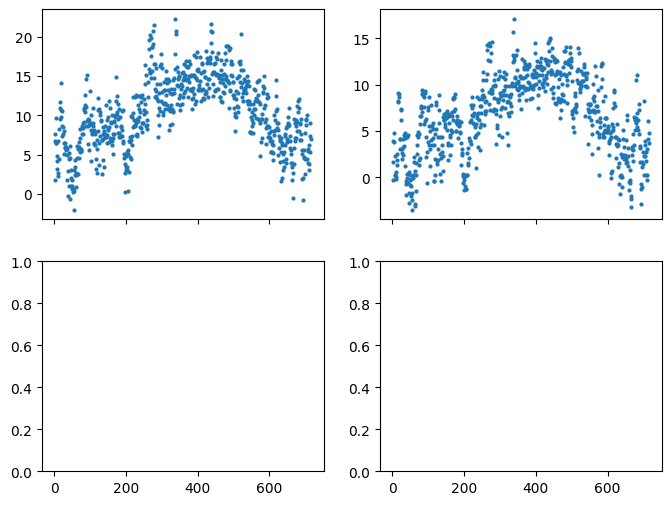

In [3]:
# Reading the .dat file
df = pd.read_csv("environmental_modeling\chapter2\le98temp.dat", delim_whitespace=True, header=None)
df.columns = [["register", "datetime", "max_temp", "min_temp"]]

x = df.register
y1 = df.max_temp
y2 = df.min_temp

# Create the grid of subplots, here in the nrows and n cols 
# we can control the grid distribution. 
fig, ax = plt.subplots(
    nrows = 2, 
    ncols = 2, 
    figsize = (8,6), 
    sharex = True
)

# first plot
ax[(0,0)].plot(x, y1, marker = "o", linestyle = "", markersize = 2)

# second plot
ax[(0,1)].plot(x, y2, marker = "o", linestyle = "", markersize = 2)


plt.show()

### Elevation model DEM

In [ ]:
# Loading elevation data.
# For reading this file, we'll use a more sophisticated procedure, because the file has
# some issues, so we can filter them up

df = pd.read_csv("environmental_modeling\chapter2\efyrnwy.dem",
                 sep=r'\s+', #regex for using any kind of space as separator
                 engine='python',
                 header=None,
                 on_bad_lines='skip',
                 dtype=str)


In [ ]:
# This is for reading each line of the file, so we can 
# read it propertly. We just select the first 3 columns because
# the file has an issue. 
path = r"environmental_modeling\chapter2\efyrnwy.dem"
pat = re.compile(r'\s+')  #regex for using any kind of space as separator

rows = []
with open(path, 'r', encoding='utf-8') as f:
    for line in f:
        s = line.strip()
        if not s:
            continue
        parts = pat.split(s)
        # Take the first 3 rows, and if there is missing some row,
        # fill it with a nan.
        row = parts[:3] + [np.nan] * max(0, 3 - len(parts))
        rows.append(row)

df = pd.DataFrame(rows, columns=['x', 'y', 'z'])
# Converting to numeric
df = df.apply(pd.to_numeric, errors='coerce')

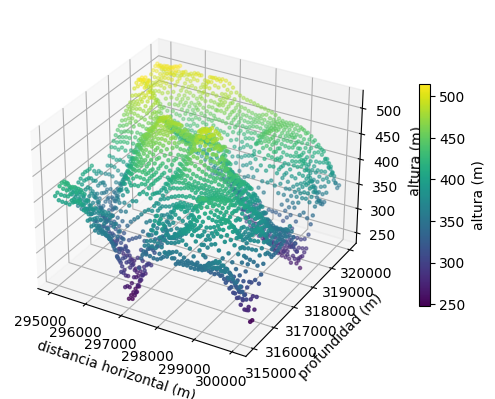

In [ ]:
# Plotting the scatter 3d plot
x = df.x
y = df.y
z = df.z

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
surf = ax.scatter(df.x, df.y, df.z, c=df.z, cmap='viridis', s=5)
fig.colorbar(surf, shrink=0.6, label='altura (m)')
ax.set_xlabel('distancia horizontal (m)')
ax.set_ylabel('profundidad (m)')
ax.set_zlabel('altura (m)')

plt.tight_layout()
plt.show()

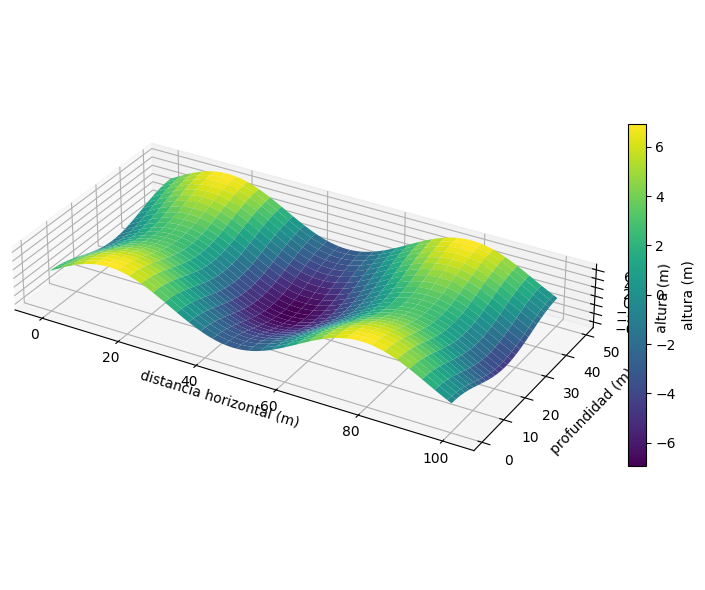

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario en versiones antiguas de mpl

# datos de ejemplo (vectores)
x = np.linspace(0, 100, 101)          # distancia horizontal
y = np.linspace(0, 50, 51)            # profundidad
X, Y = np.meshgrid(x, y)              # malla
Z = np.sin(X/10) * 5 + np.cos(Y/8) * 2  # ejemplo de altura

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.6, label='altura (m)')
ax.set_xlabel('distancia horizontal (m)')
ax.set_ylabel('profundidad (m)')
ax.set_zlabel('altura (m)')

# si 'profundidad' es positivo hacia abajo y quieres que el eje y vaya hacia abajo:
# ax.invert_yaxis()

# ajustar aspecto (matplotlib >= 3.3)
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(Z)))  # proporción aproximada

plt.tight_layout()
plt.show()